In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
import os 
import seaborn as sns 
from scipy.special import softmax 
import pandas as pd 
import sys 


In [2]:

#excluded 296
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-292', 'sub-311', 'sub-267', 'sub-295', 
'sub-305', 'sub-274', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-127', 'sub-279', 
'sub-315', 'sub-314']
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111',  'sub-134', 'sub-132', 'sub-144']


def get_result_dataset(dataset,rep_name,normalize_isc=True):
    results=[]
    for story in dataset:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+rep_name+"/"
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI_new.npy')
        for sub in subs:
            results_sub_parcels=np.arctanh(np.load(result_dir+sub+"_parcelwise_results_banded_ridge.npy")[:,3])
            noise_ceiling_parcels=np.arctanh(np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy'))
            results_sub_parcels[np.isnan(results_sub_parcels)]=0.0
            noise_ceiling_parcels[np.isnan(noise_ceiling_parcels)]=0.0
            results_sub=np.zeros((22,)) 
            noise_sub=np.zeros((22,))
            
            for roi in range(22):
                results_sub[roi]=results_sub_parcels[np.where(roi_mapping==roi+1)].mean() 
                noise_sub[roi]=noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean()
            #results_story.append(-1*np.log(results_sub/noise_sub))
            if normalize_isc:
                r=(results_sub/noise_sub)*100.0 
                r[r>100.0]=100.0
                results_story.append((results_sub/noise_sub)*100.0)
            else:
                results_story.append((results_sub))
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.asarray(results)
    results=np.concatenate(results,axis=0)
    results[np.isnan(results)]=0.0
    return results 
    #return results*-1 
    #if normalize_isc:
    #    return (np.concatenate(results,axis=0)/noise_ceiling)*100.0
    #else:
    #    return np.concatenate(results,axis=0)

def get_result_dataset_joint(dataset,rep_name,idx,normalize_isc=True):
    results=[]
    for story in dataset:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+rep_name+"/"
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+story+'_data/Parcel2ROI_new.npy')
        for sub in subs:
            results_sub_parcels=np.arctanh(np.load(result_dir+sub+"_parcelwise_results_banded_ridge.npy")[:,idx])
            noise_ceiling_parcels=np.arctanh(np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy'))
            results_sub_parcels[np.isnan(results_sub_parcels)]=0.0
            noise_ceiling_parcels[np.isnan(noise_ceiling_parcels)]=0.0
            results_sub=np.zeros((22,)) 
            noise_sub=np.zeros((22,))
            
            for roi in range(22):
                results_sub[roi]=results_sub_parcels[np.where(roi_mapping==roi+1)].mean() 
                noise_sub[roi]=noise_ceiling_parcels[np.where(roi_mapping==roi+1)].mean()
            #results_story.append(-1*np.log(results_sub/noise_sub))
            if normalize_isc:
                r=(results_sub/noise_sub)*100.0 
                r[r>100.0]=100.0
                results_story.append((results_sub/noise_sub)*100.0)
            else:
                results_story.append((results_sub))
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.asarray(results)
    results=np.concatenate(results,axis=0)
    results[np.isnan(results)]=0.0
    return results 
    #return results*-1 
    #if normalize_isc:
    #    return (np.concatenate(results,axis=0)/noise_ceiling)*100.0
    #else:
    #    return np.concatenate(results,axis=0)


In [3]:

rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG','V1']
#rois=['HG','PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC']

roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 

raw_data_layers=np.asarray([get_result_dataset(['black','slumlordreach'],'layer_'+str(i)+"_activations") for i in range(1,13)])
raw_data_z=np.asarray([get_result_dataset(['black','slumlordreach'],'layer_'+str(i)+"_z_representations") for i in range(12)])


/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [4]:

roi=[] 
performance=[]
roi_color=[]
layers=[] 
rep_type=[]
for layer_number in range(12):
    curr_layer=raw_data_layers[layer_number]
    curr_z=raw_data_z[layer_number]

    for i in range(curr_layer.shape[0]):
        for j in range(10):

            #hemi.append('L' if j<10 else 'R')
            r_layer=curr_layer[i,j]
            r_z=curr_z[i,j]
            
            roi.append(rois[j%11])
            roi_color.append(rois[j%11])
            performance.append(r_layer)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('embedding')

            roi.append(rois[j%11])
            roi_color.append(rois[j%11])
            performance.append(r_z)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('transformation')



roi=np.asarray(roi)
performance=np.asarray(performance)
roi_color=np.asarray(roi_color)
layers=np.asarray(layers)
rep_type=np.asarray(rep_type)

#hemi=np.asarray(hemi)
df=pd.DataFrame(dict(layer=layers,performance=performance,roi=roi,roi_color=roi_color,rep_type=rep_type))
df

,layer,performance,roi,roi_color,rep_type
0,layer 1,27.163147,PostTemp,PostTemp,embedding
1,layer 1,8.260167,PostTemp,PostTemp,transformation
2,layer 1,12.771202,AntTemp,AntTemp,embedding
3,layer 1,-3.550831,AntTemp,AntTemp,transformation
4,layer 1,13.751126,AngG,AngG,embedding
...,...,...,...,...,...
14635,layer 12,20.947864,dmPFC,dmPFC,transformation
14636,layer 12,15.324404,PMC,PMC,embedding
14637,layer 12,13.836047,PMC,PMC,transformation
14638,layer 12,11.966711,HG,HG,embedding


In [5]:
pal2=sns.color_palette(['tab:'+x for x in ['blue','red']])
roi_order=['HG','PostTemp','AntTemp','AngG','IFG',
'IFGorb','MFG','vmPFC','dmPFC','PMC']


order=roi_order 

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


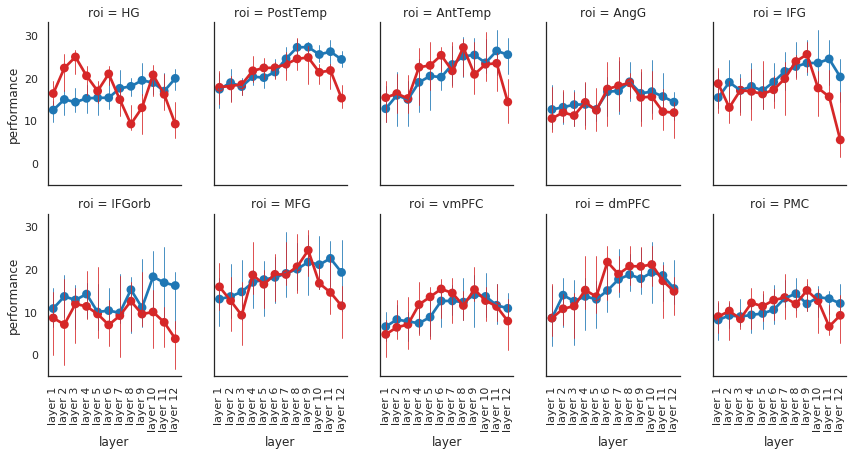

In [6]:
sns.set(style='white', font_scale=1)
g=sns.FacetGrid(data=df,col='roi',hue='rep_type',palette=pal2,col_order=order,col_wrap=5,sharex=True,sharey=True)
g.map(sns.pointplot,'layer','performance',dodge=0.4,join=True,ci=95,capsize=0,zorder=2,estimator=np.median,err_kws = {"alpha": .5},errwidth=0.8,s=3)
for i in range(len(g.axes)):
    g.axes[i].set_xticklabels(g.axes[i].get_xticklabels(),rotation=90)
g.fig.set_figwidth(12)
#plt.savefig('plots_for_sam/figure3_lineplots.svg',format='svg')

In [7]:

roi=[] 
performance=[]
roi_color=[]
layers=[] 
rep_type=[]
for layer_number in range(12):
    curr_layer=raw_data_layers[layer_number]
    curr_z=raw_data_z[layer_number]

    for i in range(curr_layer.shape[0]):
        for j in range(10):

            #hemi.append('L' if j<10 else 'R')
            r_layer=curr_layer[i,j]
            r_z=curr_z[i,j]
            
            
            performance.append(r_layer)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('embedding')

            
            performance.append(r_z)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('transformation')



performance=np.asarray(performance)
layers=np.asarray(layers)
rep_type=np.asarray(rep_type)

#hemi=np.asarray(hemi)
df=pd.DataFrame(dict(layer=layers,performance=performance,rep_type=rep_type))
df

,layer,performance,rep_type
0,layer 1,27.163147,embedding
1,layer 1,8.260167,transformation
2,layer 1,12.771202,embedding
3,layer 1,-3.550831,transformation
4,layer 1,13.751126,embedding
...,...,...,...
14635,layer 12,20.947864,transformation
14636,layer 12,15.324404,embedding
14637,layer 12,13.836047,transformation
14638,layer 12,11.966711,embedding


Text(0.5, 1.0, 'Layerwise Encoding for All ROIs')

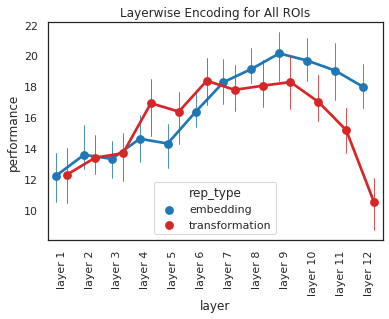

In [8]:
g=sns.pointplot(data=df,x='layer',y='performance',hue='rep_type',palette=pal2,dodge=0.4,join=True,ci=95,capsize=0,zorder=2,estimator=np.median,err_kws = {"alpha": .5},errwidth=0.8,s=3)
g.axes.set_xticklabels(g.axes.get_xticklabels(),rotation=90)
plt.title("Layerwise Encoding for All ROIs")

In [9]:

rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG','V1']
#rois=['HG','PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC']

roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 

raw_data_layers=np.asarray([get_result_dataset_joint(['black','slumlordreach'],'layer_'+str(i)+"_combined_rep",0) for i in range(12)])
raw_data_z=np.asarray([get_result_dataset_joint(['black','slumlordreach'],'layer_'+str(i)+"_combined_rep",1) for i in range(12)])
raw_data_joint=np.asarray([get_result_dataset_joint(['black','slumlordreach'],'layer_'+str(i)+"_combined_rep",2) for i in range(12)])

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [10]:

roi=[] 
performance=[]
roi_color=[]
layers=[] 
rep_type=[]
for layer_number in range(12):
    curr_layer=raw_data_layers[layer_number]
    curr_z=raw_data_z[layer_number]
    curr_joint=raw_data_joint[layer_number]

    for i in range(curr_layer.shape[0]):
        for j in range(10):

            #hemi.append('L' if j<10 else 'R')
            r_layer=curr_layer[i,j]
            r_z=curr_z[i,j]
            r_joint=curr_joint[i,j]
            
            roi.append(rois[j%11])
            roi_color.append(rois[j%11])
            performance.append(r_layer)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('embedding')

            roi.append(rois[j%11])
            roi_color.append(rois[j%11])
            performance.append(r_z)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('transformation')

            

        


roi=np.asarray(roi)
performance=np.asarray(performance)
roi_color=np.asarray(roi_color)
layers=np.asarray(layers)
rep_type=np.asarray(rep_type)

#hemi=np.asarray(hemi)
df=pd.DataFrame(dict(layer=layers,performance=performance,roi=roi,roi_color=roi_color,rep_type=rep_type))
df

,layer,performance,roi,roi_color,rep_type
0,layer 1,16.816766,PostTemp,PostTemp,embedding
1,layer 1,19.460982,PostTemp,PostTemp,transformation
2,layer 1,21.127834,AntTemp,AntTemp,embedding
3,layer 1,2.607140,AntTemp,AntTemp,transformation
4,layer 1,-17.972652,AngG,AngG,embedding
...,...,...,...,...,...
14635,layer 12,13.362109,dmPFC,dmPFC,transformation
14636,layer 12,11.983397,PMC,PMC,embedding
14637,layer 12,4.731441,PMC,PMC,transformation
14638,layer 12,27.412488,HG,HG,embedding


In [14]:
df[df.roi=='HG']['performance'].mean()

43.16213452917862

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


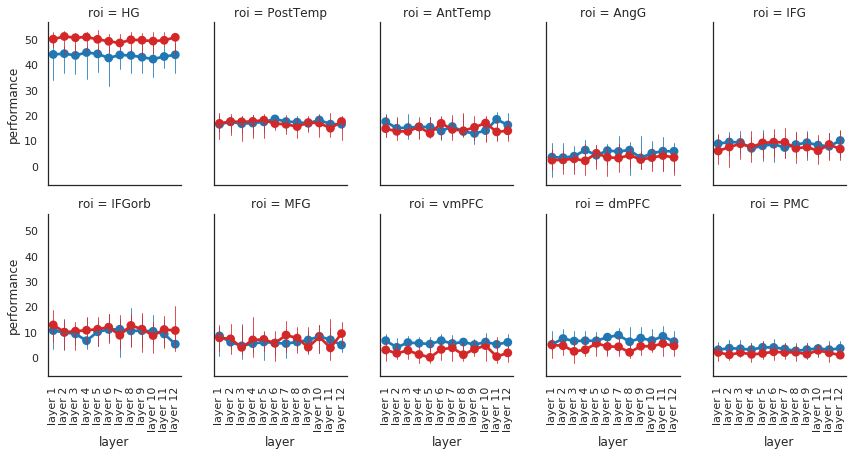

In [15]:
pal2=sns.color_palette(['tab:blue','tab:red'])
roi_order=['HG','PostTemp','AntTemp','AngG','IFG',
'IFGorb','MFG','vmPFC','dmPFC','PMC']


order=roi_order 

sns.set(style='white', font_scale=1)
g=sns.FacetGrid(data=df,col='roi',hue='rep_type',palette=pal2,col_order=order,col_wrap=5,sharex=True,sharey=True,hue_order=['embedding','transformation'])
g.map(sns.pointplot,'layer','performance',dodge=0.4,join=True,ci=95,capsize=0,zorder=2,estimator=np.median,err_kws = {"alpha": .5},errwidth=0.8,s=3)
for i in range(len(g.axes)):
    g.axes[i].set_xticklabels(g.axes[i].get_xticklabels(),rotation=90)
g.fig.set_figwidth(12)
#plt.savefig('plots_for_sam/figure3_lineplots.svg',format='svg')

In [21]:

roi=[] 
performance=[]
roi_color=[]
layers=[] 
rep_type=[]
for layer_number in range(12):
    curr_layer=raw_data_layers[layer_number]
    curr_z=raw_data_z[layer_number]

    for i in range(curr_layer.shape[0]):
        for j in range(10):

            #hemi.append('L' if j<10 else 'R')
            r_layer=curr_layer[i,j]
            r_z=curr_z[i,j]
            
            
            performance.append(r_layer)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('embedding')

            
            performance.append(r_z)
            layers.append("layer "+str(layer_number+1))
            rep_type.append('transformation')



performance=np.asarray(performance)
layers=np.asarray(layers)
rep_type=np.asarray(rep_type)

#hemi=np.asarray(hemi)
df=pd.DataFrame(dict(layer=layers,performance=performance,rep_type=rep_type))
df

,layer,performance,rep_type
0,layer 1,18.738865,embedding
1,layer 1,10.716033,transformation
2,layer 1,5.457767,embedding
3,layer 1,11.598194,transformation
4,layer 1,5.475304,embedding
...,...,...,...
14635,layer 12,32.481918,transformation
14636,layer 12,-3.369487,embedding
14637,layer 12,21.221080,transformation
14638,layer 12,8.251556,embedding


Text(0.5, 1.0, 'Layerwise Encoding for All ROIs')

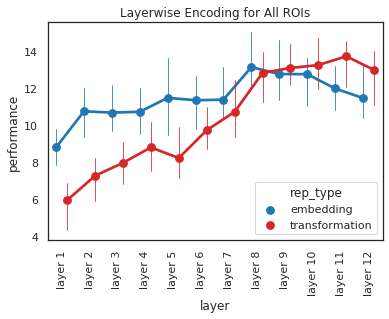

In [22]:
g=sns.pointplot(data=df,x='layer',y='performance',hue='rep_type',palette=pal2,dodge=0.4,join=True,ci=95,capsize=0,zorder=2,estimator=np.median,err_kws = {"alpha": .5},errwidth=0.8,s=3)
g.axes.set_xticklabels(g.axes.get_xticklabels(),rotation=90)
plt.title("Layerwise Encoding for All ROIs")

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


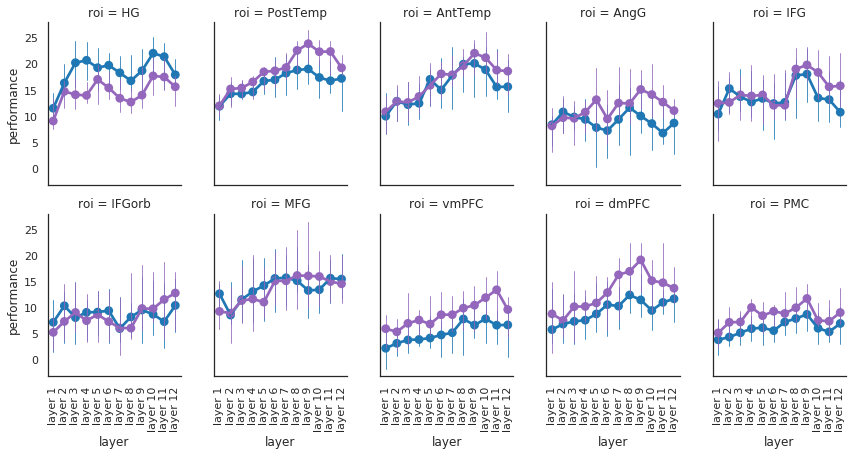

In [18]:
pal2=sns.color_palette(['tab:blue','tab:purple'])
roi_order=['HG','PostTemp','AntTemp','AngG','IFG',
'IFGorb','MFG','vmPFC','dmPFC','PMC']


order=roi_order 

sns.set(style='white', font_scale=1)
g=sns.FacetGrid(data=df,col='roi',hue='rep_type',palette=pal2,col_order=order,col_wrap=5,sharex=True,sharey=True,hue_order=['embedding','transformation'])
g.map(sns.pointplot,'layer','performance',dodge=0.4,join=True,ci=95,capsize=0,zorder=2,estimator=np.median,err_kws = {"alpha": .5},errwidth=0.8,s=3)
for i in range(len(g.axes)):
    g.axes[i].set_xticklabels(g.axes[i].get_xticklabels(),rotation=90)
g.fig.set_figwidth(12)
#plt.savefig('plots_for_sam/figure3_lineplots.svg',format='svg')